In [70]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # 해당 에러 무시

%matplotlib inline

In [3]:
df = pd.read_csv('./exams.csv') # https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [8]:
df.info()   # 컬럼 별 데이터 타입

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.describe() # 컬럼 별 데이터 통계

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [7]:
df_sc = df.iloc[:,5:]
df_sc.head()

,math score,reading score,writing score
0,67,67,63
1,40,59,55
2,59,60,50
3,77,78,68
4,78,73,68


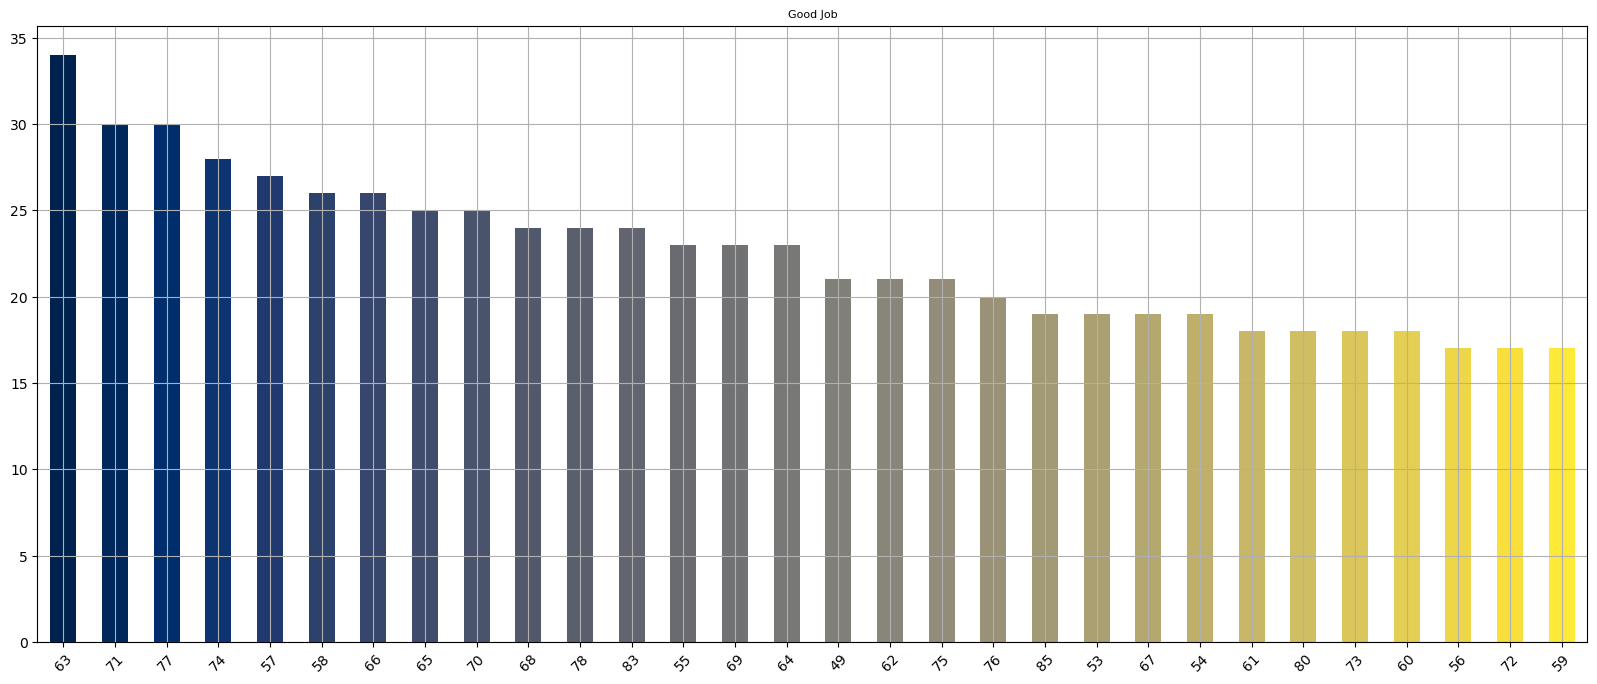

In [66]:
plt.rcParams['figure.figsize'] = (20,8)
MyColor = plt.cm.cividis(np.linspace(0,1,30))
df['math score'].value_counts().head(30).plot.bar(color=MyColor)
plt.title('Good Job', fontsize=8)
plt.xticks(rotation=45)
plt.grid()
plt.show()

[Text(0.5, 1.0, 'Math & Reading Scores Corr')]

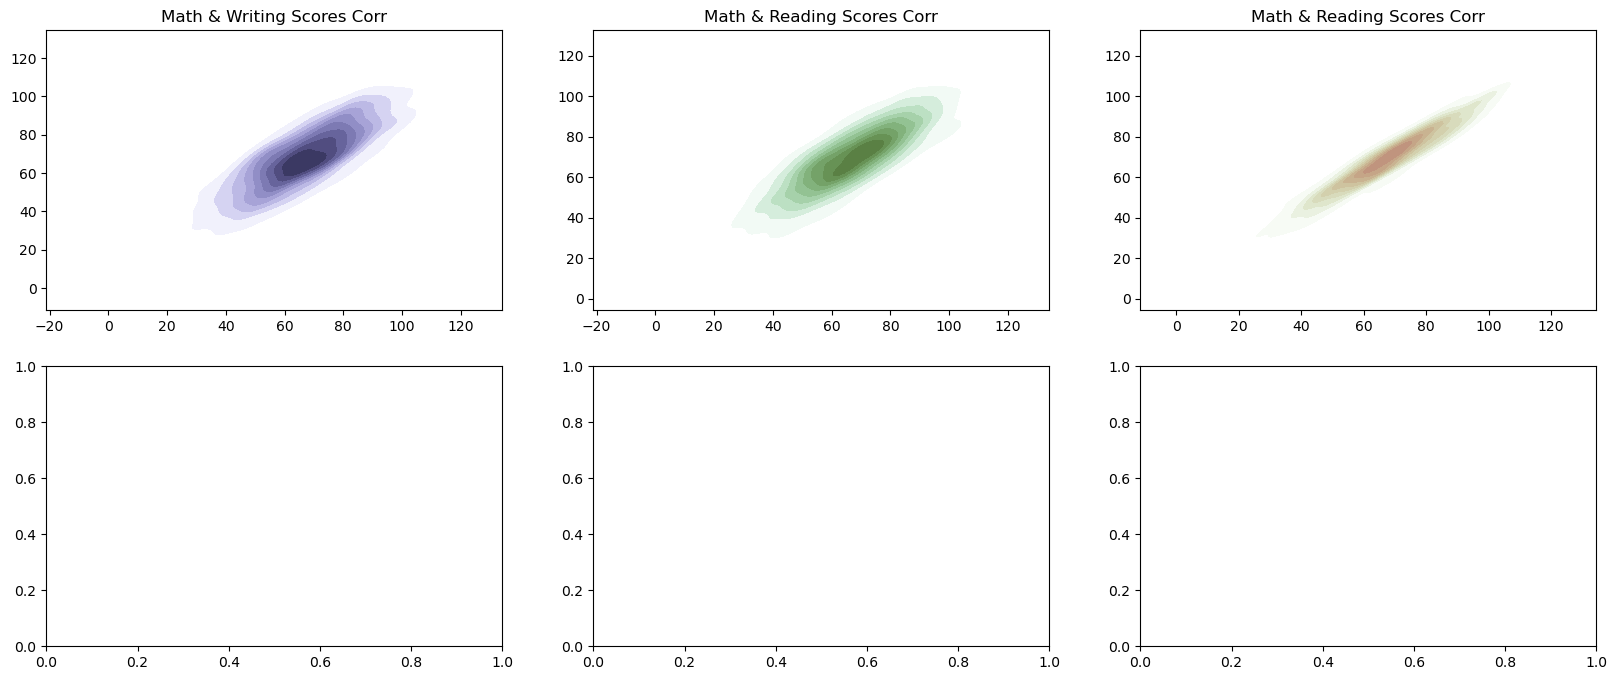

In [71]:
'''변수 관계 시각화'''

# 여러 KDE Plot 생성 준비
f, axes = plt.subplots(2,3, figsize = (20,8), sharex=False, sharey=False)

# Plot 색상 설정
colrange = np.linspace(0,1,30)
Mycmap = sns.cubehelix_palette(start=0.0, rot=0.0, dark=0.2, light=1, as_cmap=True)

x = df['math score'].values
y = df['writing score'].values
sns.kdeplot(x, y, cmap=Mycmap, shade=True, cut=7, ax=axes[0,0])
axes[0,0].set(title = 'Math & Writing Scores Corr')

Mycmap = sns.cubehelix_palette(start=1.5, rot=0.2, dark=0.4, light=1, as_cmap=True)

# Generate and plot
x = df['math score'].values
y = df['reading score'].values
sns.kdeplot(x, y, cmap=Mycmap, shade=True, cut=7, ax=axes[0,1])
axes[0,1].set(title = 'Math & Reading Scores Corr')

Mycmap = sns.cubehelix_palette(start=3.0, rot=0.6, dark=0.6, light=1, as_cmap=True)

# Generate and plot
x = df['writing score'].values
y = df['reading score'].values
sns.kdeplot(x, y, cmap=Mycmap, shade=True, cut=7, ax=axes[0,2])
axes[0,2].set(title = 'Math & Reading Scores Corr')

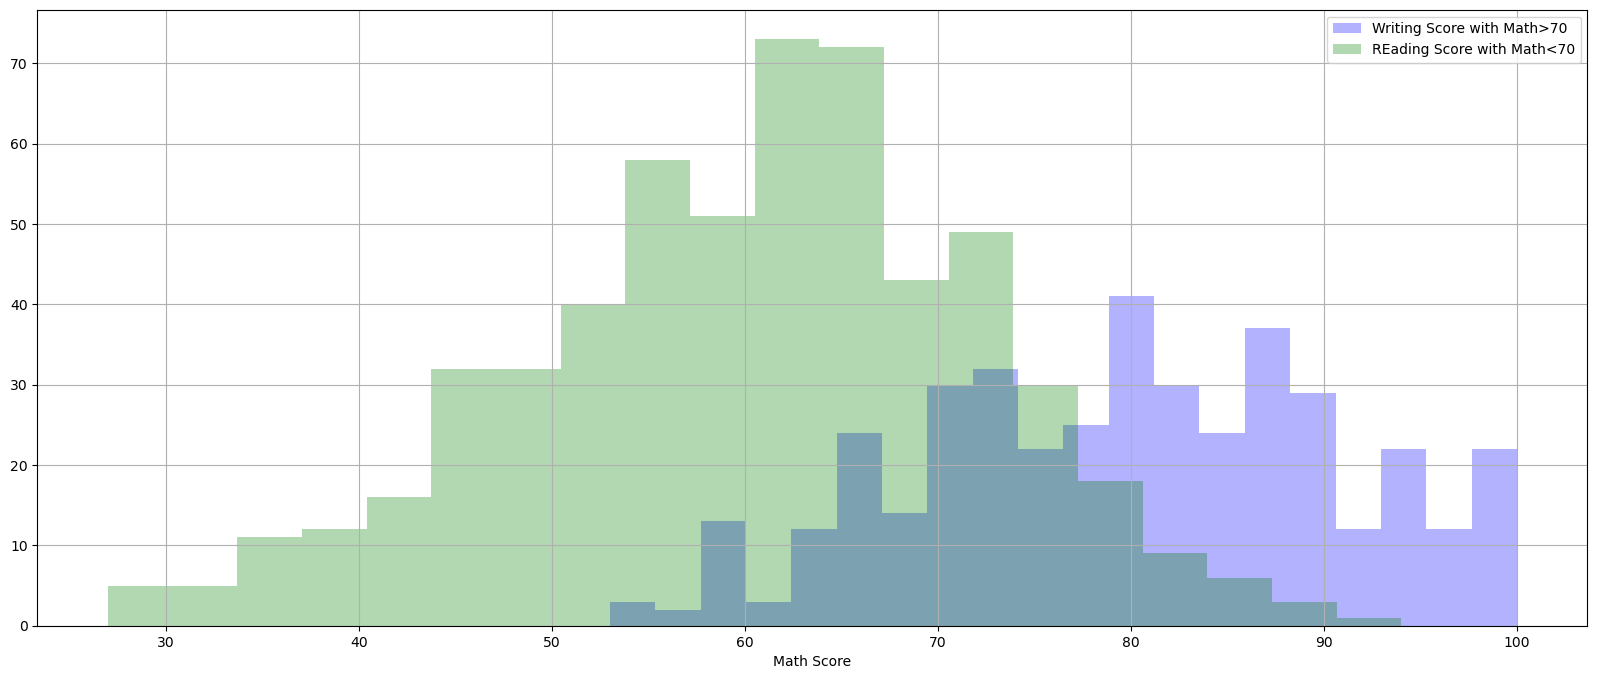

In [63]:
# 데이터 조건 별 히스토그램 
plt.figure(figsize=(20,8))
df[df['math score']>70]['writing score'].hist(alpha=0.3, color='blue', bins=20, label='Writing Score with Math>70')
df[df['math score']<70]['reading score'].hist(alpha=0.3, color='green', bins=20, label='REading Score with Math<70')
plt.xlabel('Math Score')
plt.legend()